# Training the YOLO Model

Welcome! This notebook will guide you through training the converted nuImages `v1.0-mini` dataset in YOLO format. Do note that you have to be able to run the first notebook first named `Datasset.ipynb` in order for you to run this notebook. This notebook will contain strictly training of a YOLOv8 model with the mini dataset that we have converted.

This process has three steps:
1. **Check for a GPU:** We will check if an NVIDIA GPU is available. 
2.  **Run Training:** We will load a pre-trained `yolov8n.pt` model and train it on our new mini-dataset for a few epochs.

## Setup and Imports

- `torch`: This is the PyTorch library, a powerful and popular framework for deep learning. The ultralytics library is built on top of it. We will use it directly for one crucial step: checking if an NVIDIA GPU (CUDA) is available (torch.cuda.is_available()). This allows us to automatically decide whether to train on the fast GPU or the (very slow) CPU.

- `ultralytics`: This is the official library for the YOLOv8 model. We import the main YOLO class, which is our entry point for all training and detection tasks. We will use it to load a model (YOLO('yolov8n.pt')) and to start the training process (model.train(...))

- `matplotlib`: This is the most popular plotting library in Python. We will use it to display our images and comparison plots directly inside the Jupyter notebook.

- `cv2` (OpenCV): We'll use it to read images from disk.

In [1]:
import torch
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
from pathlib import Path

## Check for a GPU

This code snippet checks if there is an nvidia GPU being detected. If it detects a GPU, it will set the device to use the GPU for training.

In [2]:
if torch.cuda.is_available():
    device = 0 # Use the first available GPU
    gpu_name = torch.cuda.get_device_name(device)
    print(f"NVIDIA GPU detected.")
    print(f"Using GPU: {gpu_name}")
else:
    device = 'cpu'
    print("No NVIDIA GPU detected.")
    print("Training will run on the CPU, which will be very slow.")
    print("For the workshop, this is okay, but for real training, a GPU is required.")

NVIDIA GPU detected.
Using GPU: NVIDIA GeForce RTX 3050


## Training the model to the mini dataset

Now that we have setup our training environment, we can start training a model. This workshop will utilize YOLOv8 from `ultralytics`. 

The code below shows how you can initialize and change different parameters of the model itself. If you want a detailed overview of each parameter that can be adjusted, I would suggest visiting the Ultralytics website for YOLOv8.

Do take note however, not declaring the parameter/hyperparameter would set it to the default setting of that parameter.

As for recommendations, If you want to tweak certain hyperparameters I would suggest the following:

- `epochs`
- `learning rate`
- `optimizer`

In [3]:
model = YOLO('yolov8n.pt')

results = model.train(
    data='nuimagesMini_YOLO/nuimages_mini.yaml',    # path to our .yaml file
    workers = 8,                                    # number of dataloader workers
    batch=16,                                       # batch size
    optimizer='SGD',                                # optimizer
    epochs=100,                                     # iterations over the entire dataset
    imgsz=640,                                      # input image size
    device=device,                                  # use the device detected
    project='yolov8s_mini',                         # save results inside our directory
    name='yolov8n_nuimages_mini'                    # name for the results folder
)

print(f"Training complete. Results saved in 'yolov8s_mini/yolov8n_nuimages_mini'.")

New https://pypi.org/project/ultralytics/8.3.229 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.199  Python-3.10.18 torch-2.8.0+cu128 CUDA:0 (NVIDIA GeForce RTX 3050, 8192MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=nuimagesMini_YOLO/nuimages_mini.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8n_nuimages_m

## Prediction Using a trained model weight

Details about the weights:

- Trained on the entire nuImages Dataset
- Trained for 300 epochs
- The weights are trained on a 2 class dataset of the nuImages dataset.

In [ ]:
model = YOLO('pretrained_weights/best.pt')

results = model.predict(
    source='test_images',                   # Path to validation images 
    conf=0.90,                              # Confidence threshold
    save=True,                              # Save prediction images
    save_txt=True,                          # Save prediction results in YOLO format
    project='pretrained_pred',              # Save results inside our directory
    name='pretrained_pred'                  # Name for the results folder
)


image 1/6 d:\Academic Workshop\test_images\test1.jpg: 736x1280 4 persons, 6 vehicles, 67.8ms
image 2/6 d:\Academic Workshop\test_images\test2.jpg: 736x1280 9 persons, 1 vehicle, 29.9ms
image 3/6 d:\Academic Workshop\test_images\test3.jpg: 736x1280 11 persons, 7 vehicles, 29.2ms
image 4/6 d:\Academic Workshop\test_images\test4.jpg: 736x1280 15 persons, 3 vehicles, 26.8ms
image 5/6 d:\Academic Workshop\test_images\test5.jpg: 736x1280 11 persons, 4 vehicles, 27.8ms
image 6/6 d:\Academic Workshop\test_images\test6.jpg: 736x1280 7 persons, 28.5ms
Speed: 6.6ms preprocess, 35.0ms inference, 1.9ms postprocess per image at shape (1, 3, 736, 1280)
Results saved to D:\Academic Workshop\pretrained_pred\pretrained_pred2
6 labels saved to D:\Academic Workshop\pretrained_pred\pretrained_pred2\labels


### Displaying the model Predictions

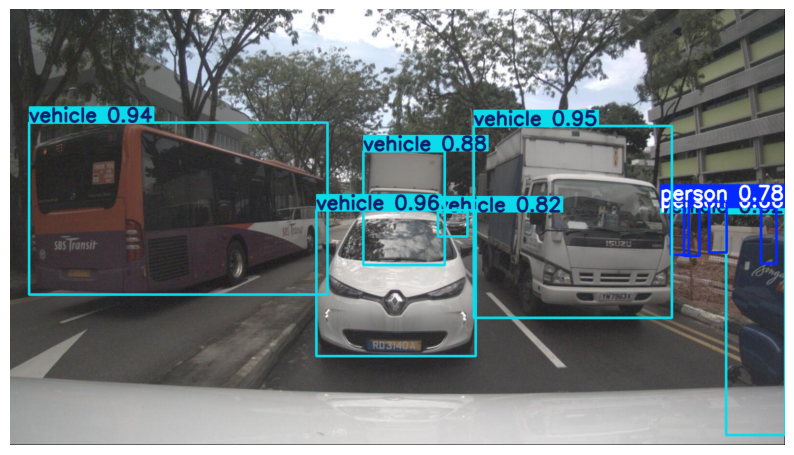

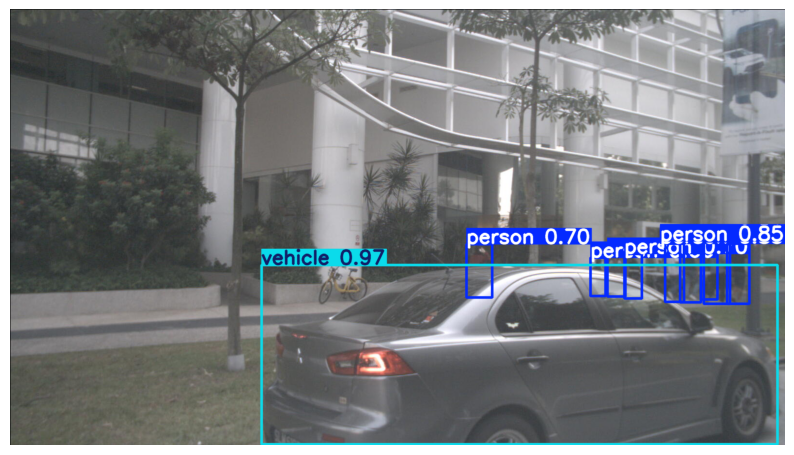

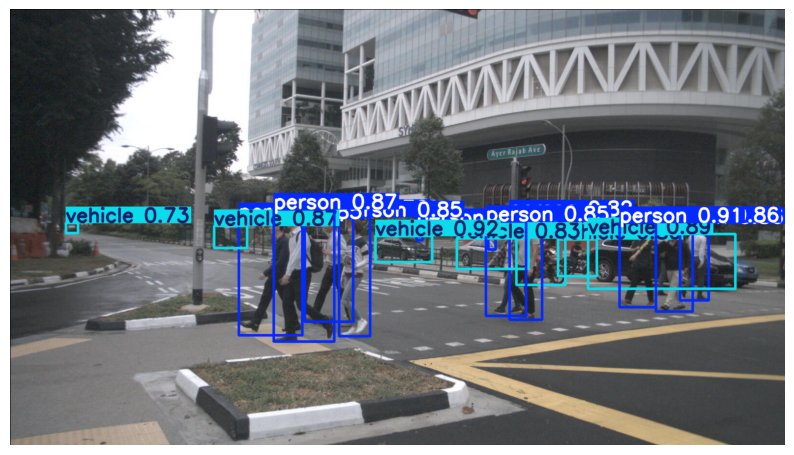

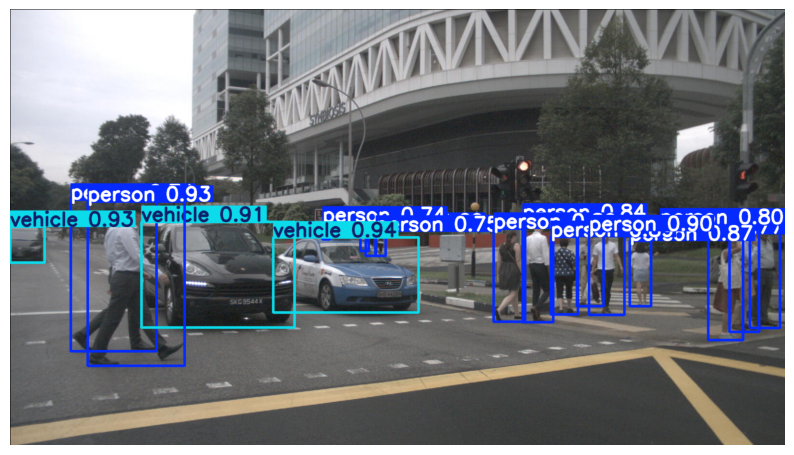

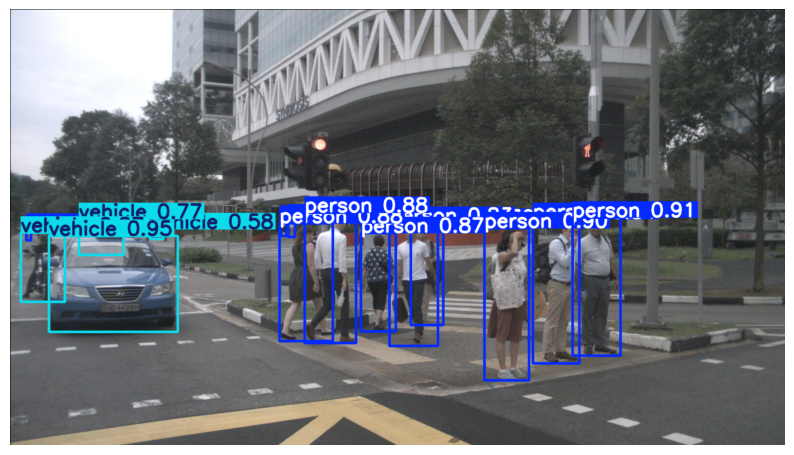

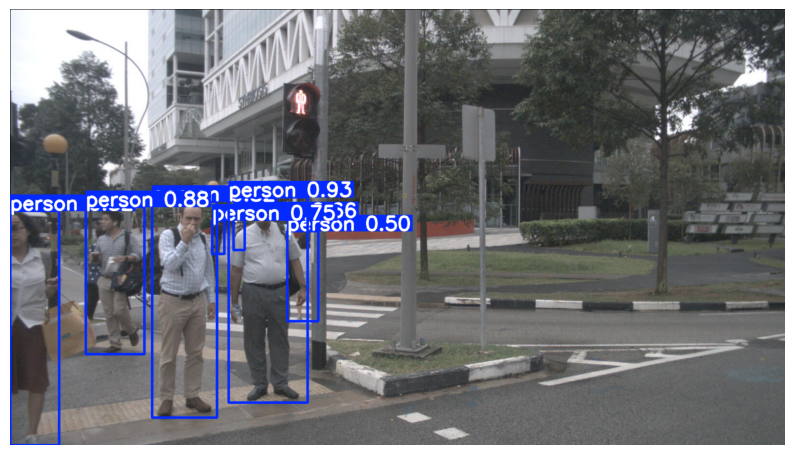

In [5]:
%matplotlib inline

for result in results:
    img_array = result.plot()
    
    img_rgb = img_array[..., ::-1] 
    
    plt.figure(figsize=(10, 10))
    plt.imshow(img_rgb)
    plt.axis('off') 
    plt.show()

# References

- `ultralytics` documentation: https://docs.ultralytics.com/models/yolov8/